In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread(r'C:\Users\MANAV MAHENDRU\Downloads\apple_side.jpg')
img2=cv2.imread(r'C:\Users\MANAV MAHENDRU\Downloads\apple_top.jpg')

In [3]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

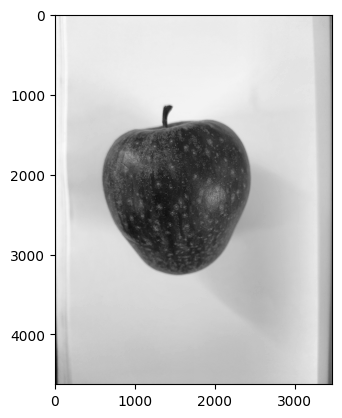

In [4]:
plt.imshow(gray1,'gray')

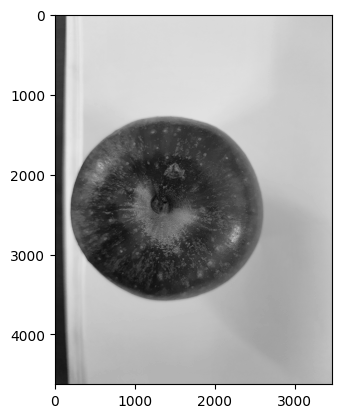

In [5]:
plt.imshow(gray2,'gray')

In [6]:
blur1 = cv2.GaussianBlur(gray1, (5, 5), 0)
blur2 = cv2.GaussianBlur(gray2, (5, 5), 0)

In [7]:
edges1 = cv2.Canny(blur1, 50, 150)
edges2 = cv2.Canny(blur2, 50, 150)

In [8]:
contours1, hierarchy1 = cv2.findContours(edges1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2, hierarchy2 = cv2.findContours(edges2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [9]:
merged_contour = np.vstack((contours1[0], contours2[0]))

In [10]:
x, y, w, h = cv2.boundingRect(merged_contour)

In [11]:
region_mask = np.zeros((img1.shape[0], img1.shape[1]), dtype=np.uint8)
cv2.drawContours(region_mask, [merged_contour], 0, 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
num_samples = 999999
count_inside = 0
for i in range(num_samples):
    x_sample = np.random.randint(x, x+w)
    y_sample = np.random.randint(y, y+h)
    if region_mask[y_sample, x_sample] == 255:
        count_inside += 1

volume = (count_inside / num_samples) * (w * h)
print('Estimated volume:', volume)

Estimated volume: 993.2514822514823
